<a href="https://colab.research.google.com/github/unjike/Modeling-and-Simulation-of-Advanced-Manufacturing-Processing/blob/main/Finite_Difference_Model_for_Joule_Heating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
## Importing usefull libraries
import numpy as np
import matplotlib.pyplot as plt
 
##initializing constants
sigma_c = 5*10**5  # S/m or kg−1⋅m−3⋅s3⋅A2  <---          Electrical conductivity (isotropic)
rho_o = 6000   # kg/m3                     <---          Density
C = 1000 # J/kgK                           <---          Heat Capacity
Kappa_o = 400  # W/m-K                     <---          Thermal conductivity (isotropic)
theta_o = 300 # K                          <---          Initial temperature
L = 0.01 # m                               <---          Domain length
E = 100 # V/m                              <---          Imposed electric field magnitude
J = sigma_c*E # A/m^2                      <---          Current density
a = 0.9 #                                  <---          Joule heating efficiency
t_f = 1 # s                                <---          Final time of simulation
dt = 10**-5 # s                            <---          Time step

#iniializing time
t=np.arange(0,t_f+10**-5, 10**-5)

# defining a function for a transient temperature distribution

def trnstempdist(n):
  '''
  This function returns a transient temperature distribution for a given number of node
  '''
  # initializing temperature
  theta = [theta_o*np.ones(n)]

  # initializing nodes
  x = np.linspace(0,0.01,n)

  # initializing node spacing
  dx = np.copy(x[1])

  # initializing matrix multiplier
  A = -2*np.identity(n)+np.eye(n, k=-1)+np.eye(n, k=1)
  A[0] = np.zeros(n)
  A[-1] = np.zeros(n)

  # evaluating joule heating term
  JH = np.ones(n)*(a*J*E)
  JH[0] = 0
  JH[-1] = 0

  # transient temperature
  for i in range(len(t)-1):
    theta.append(theta[i] + dt*Kappa_o/(rho_o*C*dx**2)*A@theta[i] + dt/(rho_o*C)*JH) 

  return theta

In [ ]:
# for 3 nodes
x = np.linspace(0,0.01,3)
theta3 = trnstempdist(3)

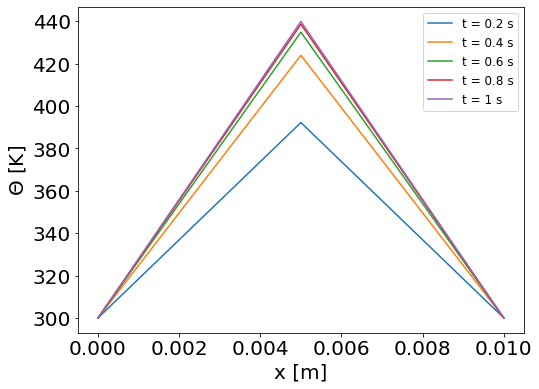

In [62]:
# analytic = lambda x: 
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
# plt.plot(x, theta3[int(t_f/(5*dt))])
plt.plot(x, theta3[int(t_f/(5*dt))])
plt.plot(x, theta3[int(2*t_f/(5*dt))])
plt.plot(x, theta3[int(3*t_f/(5*dt))])
plt.plot(x, theta3[int(4*t_f/(5*dt))])
plt.plot(x, theta3[int(t_f/(dt))])
plt.xlabel('x [m]')
plt.ylabel('$\Theta$ [K]')
plt.legend(['t = 0.2 s', 't = 0.4 s', 't = 0.6 s', 't = 0.8 s', 't = 1 s'], loc='best', fontsize = 12)

In [50]:
theta3

[array([300., 300., 300.]), array([300.    , 300.0075, 300.    ])]

In [38]:
dt*Kappa_o/(rho_o*C*dx**2)

2.6666666666666667e-05

In [39]:
JH

array([0.0e+00, 4.5e+09, 0.0e+00])

In [40]:
J

50000000